## Problem
The 1D problem can be formulated as:
$$\frac{q^2}{4} + q(0.05+0.01e)-0.32=0.04\psi$$  
$$(\psi - e) q_e = q\left( 1 - \frac{1}{2}\sqrt{\frac{q(\psi - e)}{e(1-e)}} \right)$$
with initial condition $q(0)=(2*0.07*2+(2*0.05)^2 +1)^{0.5}-2*0.05$, $\psi(0)=0$

Compiling model...
'compile' took 0.000491 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [8.71e-02, inf, 1.07e+00, 0.00e+00]         [8.68e-02, 1.87e-02, 1.07e+00, 0.00e+00]    [9.74e-01]    
1000      [nan, nan, nan, nan]                        [nan, nan, nan, nan]                        [nan]         

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 2.861205 s



AttributeError: 'NoneType' object has no attribute 'shape'

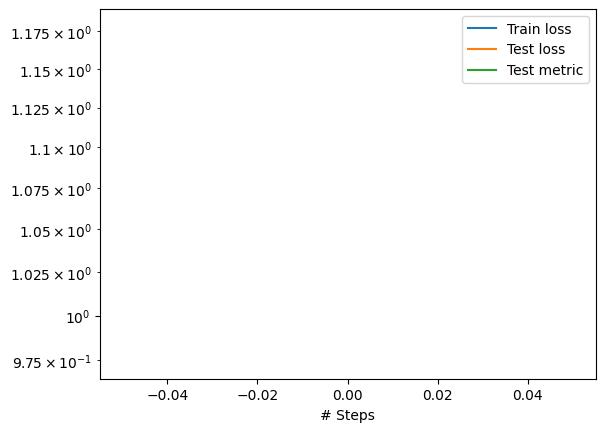

In [4]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np

sig = 0.1
deltae = 0.05
deltah = 0.05
rho = 0.06
r = 0.05
ae = 0.11
ah = 0.07
kappa = 2

def ode_system(e, X):
    """ODE system.
    """
    # Most backends
    q, psi = X[:, 0:1], X[:, 1:]
    dq_de = dde.grad.jacobian(X, e, i=0)
    iota = (q**2-1)/(2*kappa)
    sigq = (((ae-ah)/q+deltah-deltae)/(psi/e-(1-psi)/(1-e)))**0.5 - sig
    sigq[sigq.isnan().bool()] = 0

    return [
        q*(r*(1-e)+rho*e) - psi*ae - (1-psi)*ah + iota,
        (psi-e)*dq_de - q*(1-sig/(sig+sigq))
    ]


def boundary(_, on_initial):
    return on_initial


def func(t):
    """
    x = 0.5(e^{4t}+e^{-2t})
    y = 0.5(e^{4t}-e^{-2t})
    """
    return 0.5*np.hstack((np.exp(4*t) + np.exp(-2*t), np.exp(4*t) - np.exp(-2*t)))


geom = dde.geometry.TimeDomain(0, 1)
ic1 = dde.icbc.IC(geom, lambda x: (2*0.07*2+(2*0.05)**2 +1)**0.5-2*0.05, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 0, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.963856 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.11e-01, nan, 1.07e+00, 0.00e+00]         [1.11e-01, 2.46e-02, 1.07e+00, 0.00e+00]    [9.93e-01]    

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.227567 s



AttributeError: 'NoneType' object has no attribute 'shape'

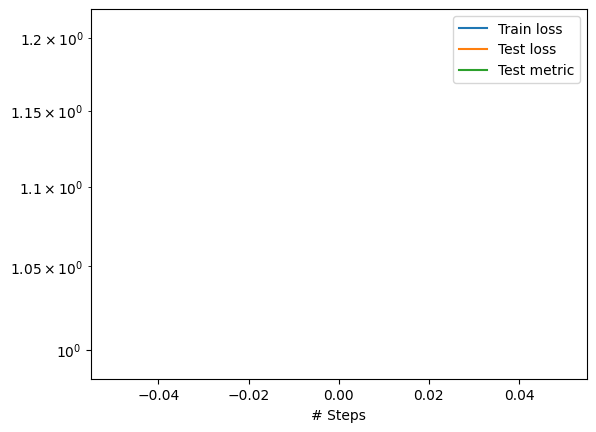

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np


def ode_system(e, X):
    """ODE system.
    """
    # Most backends
    q, psi = X[:, 0:1], X[:, 1:]
    dq_de = dde.grad.jacobian(X, e, i=0)
    return [
        q**2 / 4 + q*(0.05+0.01*e) - 0.32 - 0.04*psi,
        (psi-e)*dq_de - q*(1-0.5*(q*(psi-e) / (e*(1-e)))**0.5)
    ]


def boundary(_, on_initial):
    return on_initial


def func(t):
    """
    x = 0.5(e^{4t}+e^{-2t})
    y = 0.5(e^{4t}-e^{-2t})
    """
    return 0.5*np.hstack((np.exp(4*t) + np.exp(-2*t), np.exp(4*t) - np.exp(-2*t)))


geom = dde.geometry.TimeDomain(0, 1)
ic1 = dde.icbc.IC(geom, lambda x: (2*0.07*2+(2*0.05)**2 +1)**0.5-2*0.05, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 0, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)